# Data augmentation

The idea is simple: we don't have that many images, so let's make the most of the few we have. We'll generate new images by applying a number of transformations to the ones we have: we will zoom in, out, distort them a bit, translate them, rotate them... 

Luckily, we basically don't have to code any of this: it's already provided by the ImageDataGenerator class in Keras!

In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, InputLayer, Flatten, Dense
from keras.optimizers import Adam
import os

base_dir = 'data/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(rescale=1 / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1 / 255)

Using TensorFlow backend.


In [3]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(72,72),
                                                    batch_size=100,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(72,72),
                                                        batch_size=100,
                                                        class_mode='binary')

Found 4765 images belonging to 2 classes.
Found 888 images belonging to 2 classes.


In [4]:
my_2nd_cnn = keras.Sequential()
my_2nd_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(72, 72, 3)))
my_2nd_cnn.add(MaxPooling2D((2,2)))
my_2nd_cnn.add(Conv2D(32, (3, 3), activation='relu'))
my_2nd_cnn.add(MaxPooling2D((2,2)))
my_2nd_cnn.add(Flatten())
my_2nd_cnn.add(Dense(64, activation='relu'))
my_2nd_cnn.add(Dense(1, activation='sigmoid'))

my_2nd_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                524352    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total para

In [5]:
my_2nd_cnn.compile(loss='binary_crossentropy',
                   optimizer=Adam(lr=1e-3),
                   metrics=['acc'])

history = my_2nd_cnn.fit_generator(train_generator,
                                   steps_per_epoch=30,
                                   epochs=25,
                                   validation_data=validation_generator,
                                   validation_steps=10,
                                   verbose=1)

Epoch 1/25
30/30 [==============================] - 82s 3s/step - loss: 0.3704 - acc: 0.8711 - val_loss: 0.3181 - val_acc: 0.8725
Epoch 2/25
30/30 [==============================] - 14s 477ms/step - loss: 0.3120 - acc: 0.8747 - val_loss: 0.3114 - val_acc: 0.8634
Epoch 3/25
30/30 [==============================] - 14s 455ms/step - loss: 0.2740 - acc: 0.8782 - val_loss: 0.2588 - val_acc: 0.8735
Epoch 4/25
30/30 [==============================] - 15s 484ms/step - loss: 0.2714 - acc: 0.8753 - val_loss: 0.2561 - val_acc: 0.8644
Epoch 5/25
30/30 [==============================] - 14s 450ms/step - loss: 0.2562 - acc: 0.8789 - val_loss: 0.2447 - val_acc: 0.8907
Epoch 6/25
30/30 [==============================] - 13s 446ms/step - loss: 0.2612 - acc: 0.8839 - val_loss: 0.2345 - val_acc: 0.8917
Epoch 7/25
30/30 [==============================] - 14s 467ms/step - loss: 0.2464 - acc: 0.8970 - val_loss: 0.2327 - val_acc: 0.8978
Epoch 8/25
30/30 [==============================] - 13s 437ms/step - los

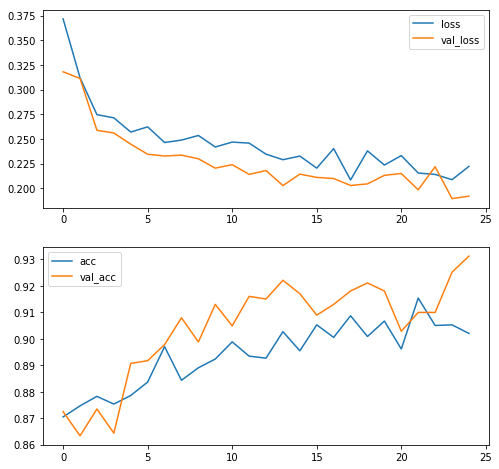

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

f, axes = plt.subplots(2,1)

f.set_size_inches(8,8)


axes[0].plot(history.epoch, history.history['loss'], label='loss')
axes[0].plot(history.epoch, history.history['val_loss'], label='val_loss')
axes[0].legend()

axes[1].plot(history.epoch, history.history['acc'], label='acc')
axes[1].plot(history.epoch, history.history['val_acc'], label='val_acc')
axes[1].legend()

Wow, now I am underfitting! I guess that means I can make my model even a bit more complex, let's see

### One more layer

In [7]:
my_3rd_cnn = keras.Sequential()
my_3rd_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(72, 72, 3)))
my_3rd_cnn.add(MaxPooling2D((2,2)))
my_3rd_cnn.add(Conv2D(32, (3, 3), activation='relu'))
my_3rd_cnn.add(MaxPooling2D((2,2)))
my_3rd_cnn.add(Flatten())
my_3rd_cnn.add(Dense(128, activation='relu'))
my_3rd_cnn.add(Dense(128, activation='relu'))
my_3rd_cnn.add(Dense(64, activation='relu'))
my_3rd_cnn.add(Dense(1, activation='sigmoid'))

my_3rd_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
__________

In [8]:
my_3rd_cnn.compile(loss='binary_crossentropy',
                   optimizer=Adam(lr=1e-3),
                   metrics=['acc'])

history = my_3rd_cnn.fit_generator(train_generator,
                                   steps_per_epoch=30,
                                   epochs=20,
                                   validation_data=validation_generator,
                                   validation_steps=10,
                                   verbose=1)

Epoch 1/20
30/30 [==============================] - 17s 566ms/step - loss: 0.3761 - acc: 0.8757 - val_loss: 0.3336 - val_acc: 0.8634
Epoch 2/20
30/30 [==============================] - 13s 447ms/step - loss: 0.3192 - acc: 0.8763 - val_loss: 0.3562 - val_acc: 0.8715
Epoch 3/20
30/30 [==============================] - 14s 458ms/step - loss: 0.3122 - acc: 0.8684 - val_loss: 0.2779 - val_acc: 0.8735
Epoch 4/20
30/30 [==============================] - 14s 481ms/step - loss: 0.2783 - acc: 0.8800 - val_loss: 0.2756 - val_acc: 0.8745
Epoch 5/20
30/30 [==============================] - 14s 459ms/step - loss: 0.2827 - acc: 0.8781 - val_loss: 0.2718 - val_acc: 0.8877
Epoch 6/20
30/30 [==============================] - 13s 445ms/step - loss: 0.2576 - acc: 0.8949 - val_loss: 0.2289 - val_acc: 0.9008
Epoch 7/20
30/30 [==============================] - 13s 442ms/step - loss: 0.2608 - acc: 0.8901 - val_loss: 0.2597 - val_acc: 0.8806
Epoch 8/20
30/30 [==============================] - 14s 453ms/step - 

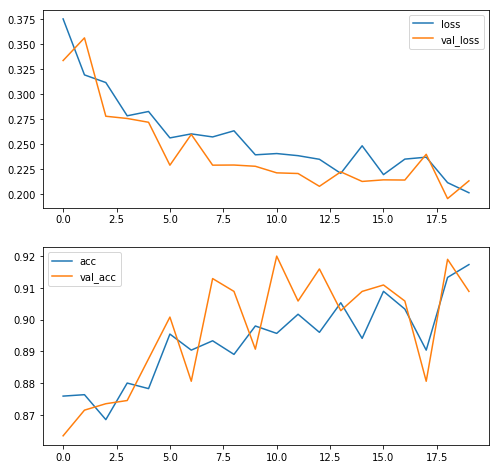

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

f, axes = plt.subplots(2,1)

f.set_size_inches(8,8)


axes[0].plot(history.epoch, history.history['loss'], label='loss')
axes[0].plot(history.epoch, history.history['val_loss'], label='val_loss')
axes[0].legend()

axes[1].plot(history.epoch, history.history['acc'], label='acc')
axes[1].plot(history.epoch, history.history['val_acc'], label='val_acc')
axes[1].legend()

One of the best pieces of advice I got from Jeremy Howard's Deep Learning for Coders is that you should first attempt to overfit, then deal with that through regularization. It makes a lot of sense: once you have overfitting, you know you've juiced your model to the max. If you don't, you don't know whether there is still a lot of life left on it or it's at the maximum performance it's going to get. Let's go for that overfitting. 

Once a model stops improving with a particular learning rate, it's often useful to reduce the learning rate and keep training.

In [10]:
my_3rd_cnn.compile(loss='binary_crossentropy',
                   optimizer=Adam(lr=1e-4),
                   metrics=['acc'])

history_pt2 = my_3rd_cnn.fit_generator(train_generator,
                                       steps_per_epoch=30,
                                       epochs=30,
                                       validation_data=validation_generator,
                                       validation_steps=10,
                                       verbose=1)

Epoch 1/30
30/30 [==============================] - 17s 551ms/step - loss: 0.2056 - acc: 0.9163 - val_loss: 0.2080 - val_acc: 0.9200
Epoch 2/30
30/30 [==============================] - 14s 459ms/step - loss: 0.1916 - acc: 0.9207 - val_loss: 0.2141 - val_acc: 0.9130
Epoch 3/30
30/30 [==============================] - 14s 452ms/step - loss: 0.2058 - acc: 0.9116 - val_loss: 0.2117 - val_acc: 0.9130
Epoch 4/30
30/30 [==============================] - 14s 473ms/step - loss: 0.1908 - acc: 0.9180 - val_loss: 0.1978 - val_acc: 0.9150
Epoch 5/30
30/30 [==============================] - 14s 456ms/step - loss: 0.2030 - acc: 0.9153 - val_loss: 0.2187 - val_acc: 0.9069
Epoch 6/30
30/30 [==============================] - 14s 465ms/step - loss: 0.1933 - acc: 0.9164 - val_loss: 0.2262 - val_acc: 0.9109
Epoch 7/30
30/30 [==============================] - 14s 453ms/step - loss: 0.2001 - acc: 0.9153 - val_loss: 0.2180 - val_acc: 0.9038
Epoch 8/30
30/30 [==============================] - 14s 454ms/step - 

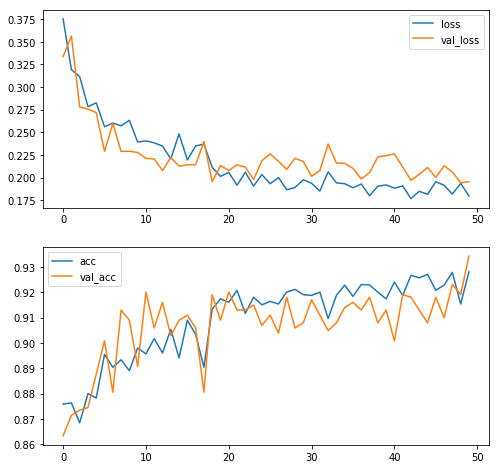

In [21]:
from itertools import chain
import matplotlib.pyplot as plt
%matplotlib inline

def plot_training_histories(*histories):

    figure, axes = plt.subplots(2,1)
    figure.set_size_inches(8,8)
    
    x_axis = range(sum([len(history.epoch) for history in histories]))
    
    for ax, metrics in enumerate([['loss', 'val_loss'], ['acc', 'val_acc']]):

        for metric in metrics:

            this_metric = [history.history[metric] for history in histories]
            merged = list(chain.from_iterable(this_metric))

            axes[ax].plot(x_axis, merged, label=metric)

        axes[ax].legend()
    
    return figure

plot_training_histories(history, history_pt2);